In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import argparse
import numpy as np
import pandas as pd
import random

In [49]:
STATS_CENTRALITY_SAVE_PATH='../data/stats.stackexchange.com/Mixed/node_centrality.csv'
STATS_TAGS_PATH='../data/stats.stackexchange.com/Tags.csv'

In [50]:
ACA_CENTRALITY_SAVE_PATH='../data/academia.stackexchange.com/node_centrality.csv'
ACA_TAGS_PATH='../data/academia.stackexchange.com/Tags.csv'

In [51]:
stats_tags = pd.read_csv(STATS_TAGS_PATH, index_col=0)
stats_tags = stats_tags.sort_values(by='Count', ascending=False)

In [52]:
aca_tags = pd.read_csv(ACA_TAGS_PATH, index_col=0)
aca_tags = aca_tags.sort_values(by='Count', ascending=False)

In [54]:
stats_tags['TagName'] = stats_tags['TagName'].apply(lambda s: s.replace('-', ' '))
stats_tags

,Count,ExcerptPostId,Id,TagName,WikiPostId
23,19446,2331.0,41,r,2254.0
50,17253,8172.0,111,regression,8171.0
5,11570,9066.0,9,machine learning,9065.0
18,8964,3017.0,30,time series,3016.0
89,6912,20256.0,188,probability,20255.0
21,5952,3019.0,38,hypothesis testing,3018.0
687,5785,51952.0,1483,self study,51951.0
4,5735,8046.0,6,distributions,8045.0
466,4892,28327.0,975,logistic,28326.0
48,4545,20262.0,94,classification,20261.0


In [55]:
aca_tags['TagName'] = aca_tags['TagName'].apply(lambda s: s.replace('-', ' '))
aca_tags

,Count,ExcerptPostId,Id,TagName,WikiPostId
83,4230,3249.0,144,publications,3248.0
36,3728,204.0,64,phd,203.0
54,2914,2153.0,89,graduate admissions,2152.0
45,1713,3219.0,76,research process,3218.0
7,1536,3247.0,16,graduate school,3246.0
15,1508,3251.0,38,citations,3250.0
92,1358,3311.0,164,thesis,3310.0
2,1301,3231.0,5,journals,3230.0
130,1273,10143.0,261,mathematics,10142.0
68,1263,3278.0,109,peer review,3277.0


In [61]:
aca_centrality = pd.read_csv(ACA_CENTRALITY_SAVE_PATH, index_col=0)
aca_centrality = aca_centrality.sort_values(by='pr_score', ascending=False)
aca_centrality

,value,pr_score
id,,
117732,paper,0.000556
149216,student,0.000478
129675,phd,0.000468
117783,research,0.000466
143702,journal,0.000449
158744,review,0.000448
127397,professor,0.000426
152243,work,0.000409
125425,author,0.000407


In [58]:
stats_centrality = pd.read_csv(STATS_CENTRALITY_SAVE_PATH, index_col=0)
stats_centrality = stats_centrality.sort_values(by='pr_score', ascending=False)
stats_centrality

,id,value,pr_score
31152,376587,distribution,0.000973
4195,348964,test,0.000948
48497,389641,model,0.000878
2849,347560,matrix,0.000747
43014,388301,time,0.000746
53472,398316,correlation,0.000718
39029,384408,variance,0.000656
5338,350132,probability,0.000650
48687,393788,sample,0.000644
27886,373292,series,0.000587


In [67]:
tags = aca_tags
centrality = aca_centrality
for k in [10, 50, 100, 250]:
    print "k:", k
    toptags = set(tags['TagName'][:k])
    topscores = set(centrality['value'][:k])
    randtags = set(random.sample(tags['TagName'], k))
    
    top_id_rate = 1.0*len(toptags & topscores)/len(toptags)
    rand_id_rate = 1.0*len(randtags & topscores)/len(toptags)
    print "Topic identification rate (exact match):", top_id_rate
#     print "Random rate (exact match):", rand_id_rate
    print "Improvement over random:", top_id_rate/rand_id_rate - 1 if rand_id_rate != 0 else float('inf')
    
    toptags_u = set([w for t in toptags for w in t.split()])
    topscores_u = set([w for t in topscores for w in t.split()])
    randtags_u = set([w for t in randtags for w in t.split()])
    
    top_id_rate_u = 1.0*len(toptags_u & topscores_u)/len(toptags_u)
    rand_id_rate_u = 1.0*len(randtags_u & topscores_u)/len(toptags_u)
    print "Topic identification rate (unigram match):", top_id_rate_u
#     print "Random rate (unigram match):", rand_id_rate_u
    print "Improvement over random:", top_id_rate_u/rand_id_rate_u - 1 if rand_id_rate_u != 0 else float('inf')
    
    print '------------------------'
    

k: 10
Topic identification rate (exact match): 0.1
Improvement over random: inf
Topic identification rate (unigram match): 0.230769230769
Improvement over random: inf
------------------------
k: 50
Topic identification rate (exact match): 0.08
Improvement over random: 1.0
Topic identification rate (unigram match): 0.147540983607
Improvement over random: 0.8
------------------------
k: 100
Topic identification rate (exact match): 0.09
Improvement over random: inf
Topic identification rate (unigram match): 0.152542372881
Improvement over random: 0.8
------------------------
k: 250
Topic identification rate (exact match): 0.092
Improvement over random: 0.4375
Topic identification rate (unigram match): 0.188612099644
Improvement over random: 0.127659574468
------------------------


```
STATS
k: 10
Topic identification rate (exact match): 0.1
Improvement over random: inf
Topic identification rate (unigram match): 0.214285714286
Improvement over random: inf
------------------------
k: 50
Topic identification rate (exact match): 0.12
Improvement over random: 2.0
Topic identification rate (unigram match): 0.219178082192
Improvement over random: 0.230769230769
------------------------
k: 100
Topic identification rate (exact match): 0.13
Improvement over random: 2.25
Topic identification rate (unigram match): 0.291338582677
Improvement over random: 0.608695652174
------------------------
k: 250
Topic identification rate (exact match): 0.224
Improvement over random: 2.29411764706
Topic identification rate (unigram match): 0.375
Improvement over random: 0.5
------------------------
```

In [77]:
centrality = stats_centrality
centrality_topwords = centrality.nlargest(10, 'pr_score')
centrality_topwords['value']

31152    distribution
4195             test
48497           model
2849           matrix
43014            time
53472     correlation
39029        variance
5338      probability
48687          sample
27886          series
Name: value, dtype: object

In [84]:
tags = stats_tags
tags_topwords = tags.nlargest(10, 'Count')
tags_topwords[['TagName','Count']].values

array([['r', 19446],
       ['regression', 17253],
       ['machine learning', 11570],
       ['time series', 8964],
       ['probability', 6912],
       ['hypothesis testing', 5952],
       ['self study', 5785],
       ['distributions', 5735],
       ['logistic', 4892],
       ['classification', 4545]], dtype=object)

In [4]:
ALL_SAVE_PATH='../data/academia.stackexchange.com/node_centrality.csv'
YEARS_SAVE_PATH='../data/academia.stackexchange.com/Years/pagerank_years.csv'

In [5]:
df_years = pd.read_csv(YEARS_SAVE_PATH)
df_all = pd.read_csv(ALL_SAVE_PATH)

In [6]:
# add ranks
for year in range(2011, 2019):
    df_years['pr_rank_%d'%year] = df_years['pr_score_%d'%year].rank(ascending=True)
    df_years['pr_rank_%d'%year] /= df_years['pr_rank_%d'%year].max()
# df_all['pr_rank'] = df_all['pr_score'].rank(ascending=True)
# df_all['pr_rank'] /= df_all['pr_rank'].max()
df_years = df_years.fillna(0)

In [42]:
for year in range(2011, 2018):
    df_years['posdelta_%d-18'%(year-2000)] = abs(df_years['pr_rank_2018']-df_years['pr_rank_%d'%year])
df_years

,value,pr_score_2011,pr_score_2012,pr_score_2013,pr_score_2014,pr_score_2015,pr_score_2016,pr_score_2017,pr_score_2018,pr_rank_2011,...,pr_rank_2016,pr_rank_2017,pr_rank_2018,delta_12-18,delta_11-18,delta_13-18,delta_14-18,delta_15-18,delta_16-18,delta_17-18
0,crim,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.637931,...,0.000000,0.000000,0.000000,0.000000,0.637931,0.000000,0.000000,0.000000,0.000000,0.000000
1,shed,0.031461,0.000000,0.000000,0.000032,0.000010,0.000034,0.000053,0.000075,0.155172,...,0.551499,0.699953,0.740492,0.740492,0.585320,0.740492,0.231379,0.638661,0.188993,0.040539
2,code,0.034483,0.000357,0.000646,0.000696,0.000658,0.000685,0.000549,0.000754,0.637931,...,0.997972,0.994766,0.998355,0.045153,0.360424,0.002719,0.000029,0.001013,0.000384,0.003589
3,phenomenon,0.031461,0.000190,0.000163,0.000109,0.000139,0.000108,0.000064,0.000000,0.155172,...,0.861675,0.743943,0.000000,0.803140,0.155172,0.866156,0.860973,0.906456,0.861675,0.743943
4,donohu,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.637931,...,0.000000,0.000000,0.000000,0.000000,0.637931,0.000000,0.000000,0.000000,0.000000,0.000000
5,grade,0.058654,0.000940,0.000788,0.000731,0.000605,0.000791,0.000947,0.000870,1.000000,...,0.998817,0.999118,0.999109,0.001203,0.000891,0.001059,0.000411,0.000056,0.000292,0.000009
6,thereof,0.034483,0.000109,0.000126,0.000027,0.000000,0.000039,0.000120,0.000018,0.637931,...,0.603110,0.886497,0.269650,0.307813,0.368281,0.449663,0.174461,0.269650,0.333460,0.616847
7,tiptoes,0.031461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155172,...,0.000000,0.000000,0.000000,0.000000,0.155172,0.000000,0.000000,0.000000,0.000000,0.000000
8,cancel,0.031461,0.000000,0.000164,0.000141,0.000092,0.000133,0.000136,0.000130,0.155172,...,0.909173,0.907081,0.831700,0.831700,0.676528,0.034781,0.072578,0.007372,0.077473,0.075381
9,suffer,0.034483,0.000027,0.000050,0.000010,0.000073,0.000108,0.000025,0.000075,0.637931,...,0.862632,0.458069,0.740903,0.671322,0.102972,0.254645,0.703457,0.053699,0.121729,0.282834


In [48]:
# signed delta, want words with positive change
for year in range(2011, 2018):
    df_years['posdelta_%d-18'%(year-2000)] = df_years['pr_rank_2018']-df_years['pr_rank_%d'%year]
df_years

,value,pr_score_2011,pr_score_2012,pr_score_2013,pr_score_2014,pr_score_2015,pr_score_2016,pr_score_2017,pr_score_2018,pr_rank_2011,...,delta_15-18,delta_16-18,delta_17-18,posdelta_11-18,posdelta_12-18,posdelta_13-18,posdelta_14-18,posdelta_15-18,posdelta_16-18,posdelta_17-18
0,crim,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.637931,...,0.000000,0.000000,0.000000,-0.637931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,shed,0.031461,0.000000,0.000000,0.000032,0.000010,0.000034,0.000053,0.000075,0.155172,...,0.638661,0.188993,0.040539,0.585320,0.740492,0.740492,0.231379,0.638661,0.188993,0.040539
2,code,0.034483,0.000357,0.000646,0.000696,0.000658,0.000685,0.000549,0.000754,0.637931,...,0.001013,0.000384,0.003589,0.360424,0.045153,0.002719,0.000029,-0.001013,0.000384,0.003589
3,phenomenon,0.031461,0.000190,0.000163,0.000109,0.000139,0.000108,0.000064,0.000000,0.155172,...,0.906456,0.861675,0.743943,-0.155172,-0.803140,-0.866156,-0.860973,-0.906456,-0.861675,-0.743943
4,donohu,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.637931,...,0.000000,0.000000,0.000000,-0.637931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,grade,0.058654,0.000940,0.000788,0.000731,0.000605,0.000791,0.000947,0.000870,1.000000,...,0.000056,0.000292,0.000009,-0.000891,0.001203,0.001059,0.000411,0.000056,0.000292,-0.000009
6,thereof,0.034483,0.000109,0.000126,0.000027,0.000000,0.000039,0.000120,0.000018,0.637931,...,0.269650,0.333460,0.616847,-0.368281,-0.307813,-0.449663,-0.174461,0.269650,-0.333460,-0.616847
7,tiptoes,0.031461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155172,...,0.000000,0.000000,0.000000,-0.155172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,cancel,0.031461,0.000000,0.000164,0.000141,0.000092,0.000133,0.000136,0.000130,0.155172,...,0.007372,0.077473,0.075381,0.676528,0.831700,-0.034781,-0.072578,0.007372,-0.077473,-0.075381
9,suffer,0.034483,0.000027,0.000050,0.000010,0.000073,0.000108,0.000025,0.000075,0.637931,...,0.053699,0.121729,0.282834,0.102972,0.671322,0.254645,0.703457,-0.053699,-0.121729,0.282834


In [33]:
def draw_pr_graph(words, name, score=False, incl2011=True):
    cols = range(1 if incl2011 else 2, 9) if score else range(9 if incl2011 else 10, 17)
    years = range(2011 if incl2011 else 2012, 2019)
    words_years = df_years.iloc[:,[0]+cols][df_years['value'].isin(words['value'])]
    words_years = words_years.set_index('value')
    plt.clf()
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 22})
    for wrow in words_years.index:
        plt.plot(years, words_years.loc[wrow])
    plt.xlabel('Year')
    plt.ylabel('PageRank score' if score else 'PageRank Percentile')
    plt.title('PageRank Over Time')
    plt.legend()
    plt.savefig('../fig/top_10ngrams_%s.png'%name)

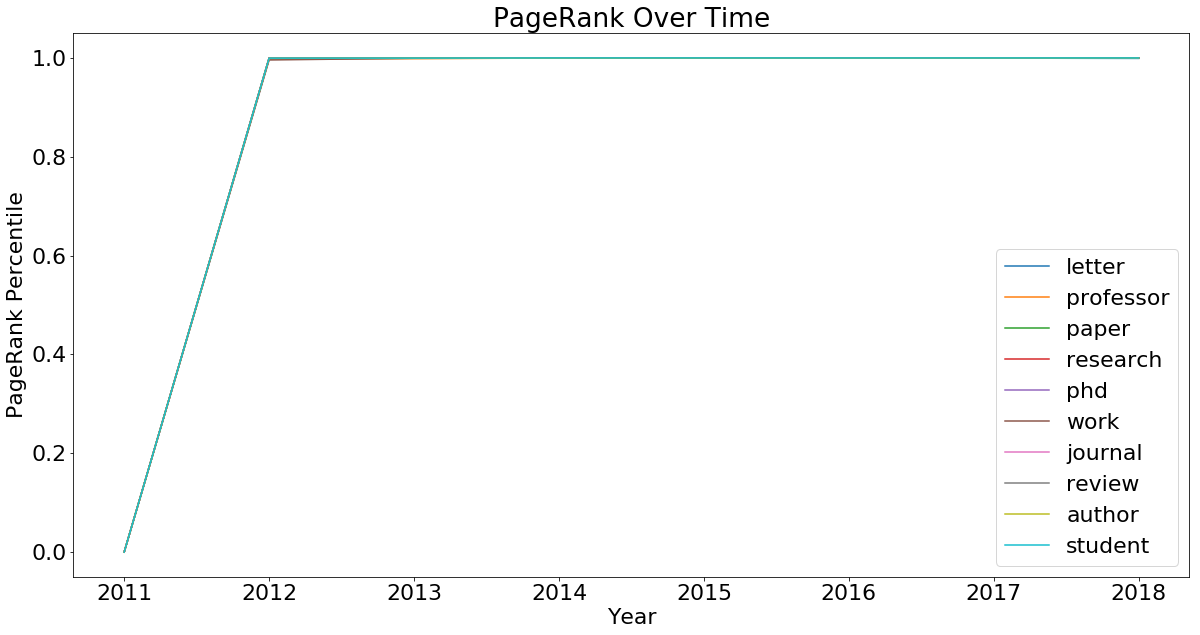

In [35]:
alltime_words = df_all.nlargest(10, 'pr_score')
draw_pr_graph(alltime_words, 'alltime', score=False, incl2011=True)

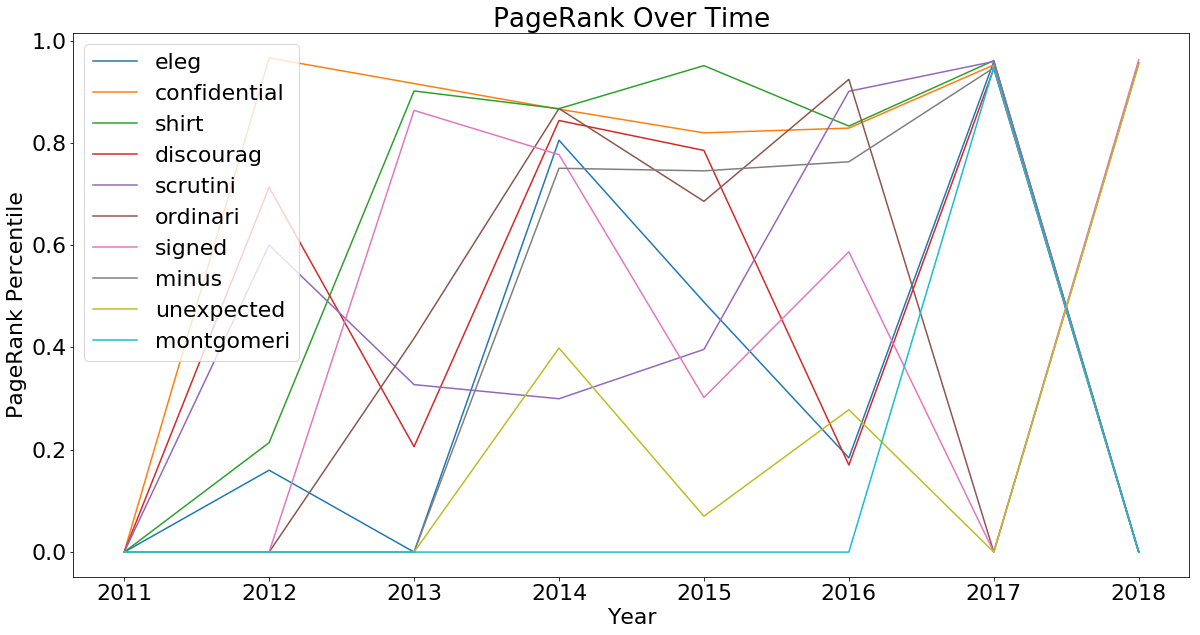

In [47]:
for year in range(2011, 2018):
    col = 'delta_%d-18'%(year-2000)
    words = df_years.nlargest(10, col)
    draw_pr_graph(words, col)

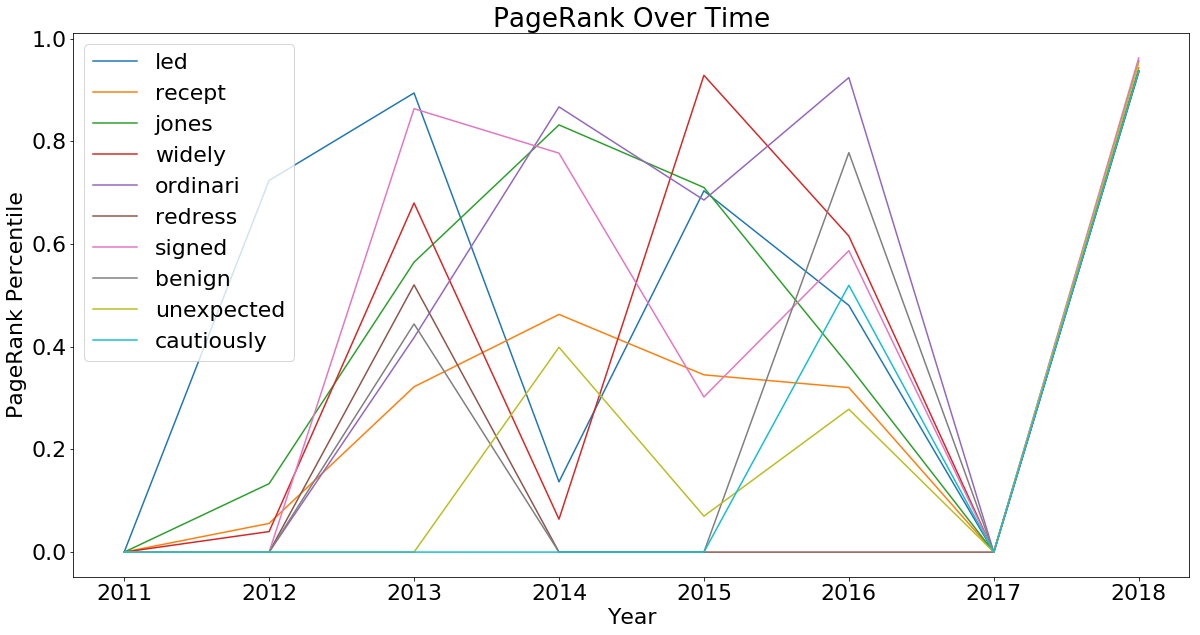

In [49]:
for year in range(2011, 2018):
    col = 'posdelta_%d-18'%(year-2000)
    words = df_years.nlargest(10, col)
    draw_pr_graph(words, col)

In [75]:
increasing_ix = (df_years['pr_rank_2011'] <= df_years['pr_rank_2012']) & \
    (df_years['pr_rank_2012'] <= df_years['pr_rank_2013']) & \
    (df_years['pr_rank_2013'] < df_years['pr_rank_2014']) & \
    (df_years['pr_rank_2014'] < df_years['pr_rank_2015']) & \
    (df_years['pr_rank_2015'] < df_years['pr_rank_2016']) & \
    (df_years['pr_rank_2016'] < df_years['pr_rank_2017']) & \
    (df_years['pr_rank_2017'] < df_years['pr_rank_2018'])
df_years[increasing_ix]

,value,pr_score_2011,pr_score_2012,pr_score_2013,pr_score_2014,pr_score_2015,pr_score_2016,pr_score_2017,pr_score_2018,pr_rank_2011,...,delta_15-18,delta_16-18,delta_17-18,posdelta_11-18,posdelta_12-18,posdelta_13-18,posdelta_14-18,posdelta_15-18,posdelta_16-18,posdelta_17-18
1930,coffe,0.0,0.000085,0.000100,0.000068,0.000057,0.000100,0.000113,0.000247,0.0,...,0.214392,0.103667,0.097197,0.957171,0.472565,0.279966,0.235907,0.214392,0.103667,0.097197
2052,write,0.0,0.000863,0.000733,0.000683,0.000557,0.000724,0.000797,0.000811,0.0,...,0.000519,0.000413,0.000188,0.998835,0.002160,0.001621,0.000819,0.000519,0.000413,0.000188
4053,typo,0.0,0.000187,0.000171,0.000128,0.000134,0.000149,0.000198,0.000232,0.0,...,0.050930,0.027025,0.000002,0.951072,0.161294,0.074331,0.060124,0.050930,0.027025,0.000002
14576,corrigendum,0.0,0.000000,0.000028,0.000028,0.000038,0.000122,0.000142,0.000212,0.0,...,0.313576,0.046555,0.028457,0.942712,0.942712,0.678181,0.493766,0.313576,0.046555,0.028457
15706,tricky,0.0,0.000000,0.000000,0.000015,0.000021,0.000040,0.000055,0.000126,0.0,...,0.369274,0.209861,0.111865,0.819845,0.819845,0.819845,0.617024,0.369274,0.209861,0.111865
17191,promises,0.0,0.000000,0.000000,0.000013,0.000015,0.000021,0.000033,0.000064,0.0,...,0.368920,0.307507,0.171895,0.705270,0.705270,0.705270,0.574767,0.368920,0.307507,0.171895
17337,lucki,0.0,0.000000,0.000000,0.000018,0.000019,0.000022,0.000025,0.000077,0.0,...,0.341756,0.334765,0.286291,0.743713,0.743713,0.743713,0.445883,0.341756,0.334765,0.286291


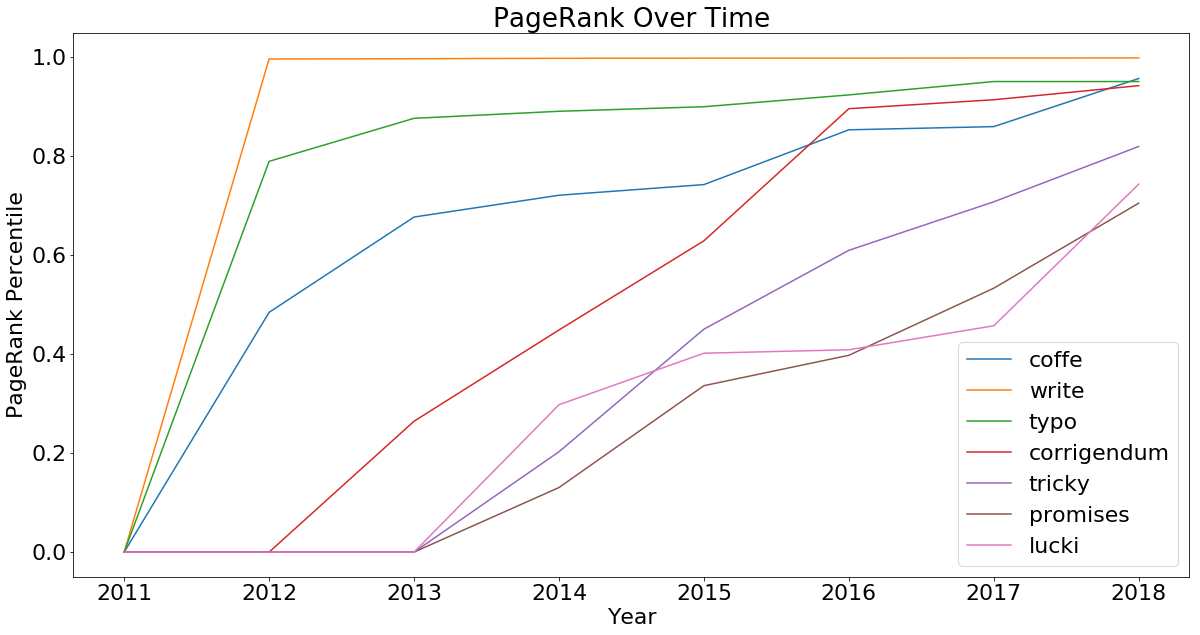

In [76]:
inc_words = df_years[increasing_ix]
draw_pr_graph(inc_words, 'incwords')

In [73]:
decreasing_ix = (df_years['pr_rank_2013'] > df_years['pr_rank_2014']) & \
    (df_years['pr_rank_2014'] > df_years['pr_rank_2015']) & \
    (df_years['pr_rank_2015'] > df_years['pr_rank_2016']) & \
    (df_years['pr_rank_2016'] > df_years['pr_rank_2017']) & \
    (df_years['pr_rank_2017'] > df_years['pr_rank_2018'])
df_years[decreasing_ix]

,value,pr_score_2011,pr_score_2012,pr_score_2013,pr_score_2014,pr_score_2015,pr_score_2016,pr_score_2017,pr_score_2018,pr_rank_2011,...,delta_15-18,delta_16-18,delta_17-18,posdelta_11-18,posdelta_12-18,posdelta_13-18,posdelta_14-18,posdelta_15-18,posdelta_16-18,posdelta_17-18
927,notabl,0.0,0.000181,0.000163,0.000058,0.000037,0.000023,0.000018,0.000013,0.0,...,0.545301,0.348567,0.258629,0.073734,-0.712842,-0.790844,-0.596198,-0.545301,-0.348567,-0.258629
2134,era,0.0,0.000150,0.000141,0.000075,0.000049,0.000053,0.000014,0.000000,0.0,...,0.709423,0.689148,0.195542,0.000000,-0.754618,-0.767967,-0.736764,-0.709423,-0.689148,-0.195542
3930,gain,0.0,0.000033,0.000339,0.000181,0.000148,0.000098,0.000057,0.000061,0.0,...,0.225326,0.156150,0.027229,0.693072,0.540116,-0.272945,-0.244498,-0.225326,-0.156150,-0.027229
5253,services,0.0,0.000094,0.000222,0.000101,0.000082,0.000068,0.000038,0.000028,0.0,...,0.364535,0.321717,0.149049,0.445693,-0.075735,-0.475570,-0.400246,-0.364535,-0.321717,-0.149049
5479,rejection,0.0,0.000067,0.000290,0.000185,0.000140,0.000086,0.000095,0.000070,0.0,...,0.177478,0.098608,0.092898,0.730556,0.320888,-0.222090,-0.208626,-0.177478,-0.098608,-0.092898
6238,ran,0.0,0.000087,0.000092,0.000054,0.000022,0.000015,0.000015,0.000000,0.0,...,0.473378,0.276172,0.238091,0.000000,-0.496675,-0.653250,-0.649101,-0.473378,-0.276172,-0.238091
6554,charge,0.0,0.000203,0.000199,0.000083,0.000058,0.000045,0.000027,0.000023,0.0,...,0.373301,0.265608,0.103244,0.373056,-0.482856,-0.533630,-0.399170,-0.373301,-0.265608,-0.103244
8119,conclusion,0.0,0.000033,0.000208,0.000105,0.000103,0.000066,0.000025,0.000026,0.0,...,0.418584,0.348771,0.042604,0.414582,0.279238,-0.497860,-0.439230,-0.418584,-0.348771,-0.042604
11401,tertiari,0.0,0.000000,0.000156,0.000041,0.000033,0.000032,0.000024,0.000015,0.0,...,0.411040,0.362525,0.271351,0.167957,0.167957,-0.681811,-0.413258,-0.411040,-0.362525,-0.271351
11670,bold,0.0,0.000000,0.000261,0.000085,0.000045,0.000051,0.000043,0.000028,0.0,...,0.244619,0.239849,0.194301,0.435551,0.435551,-0.506603,-0.340642,-0.244619,-0.239849,-0.194301


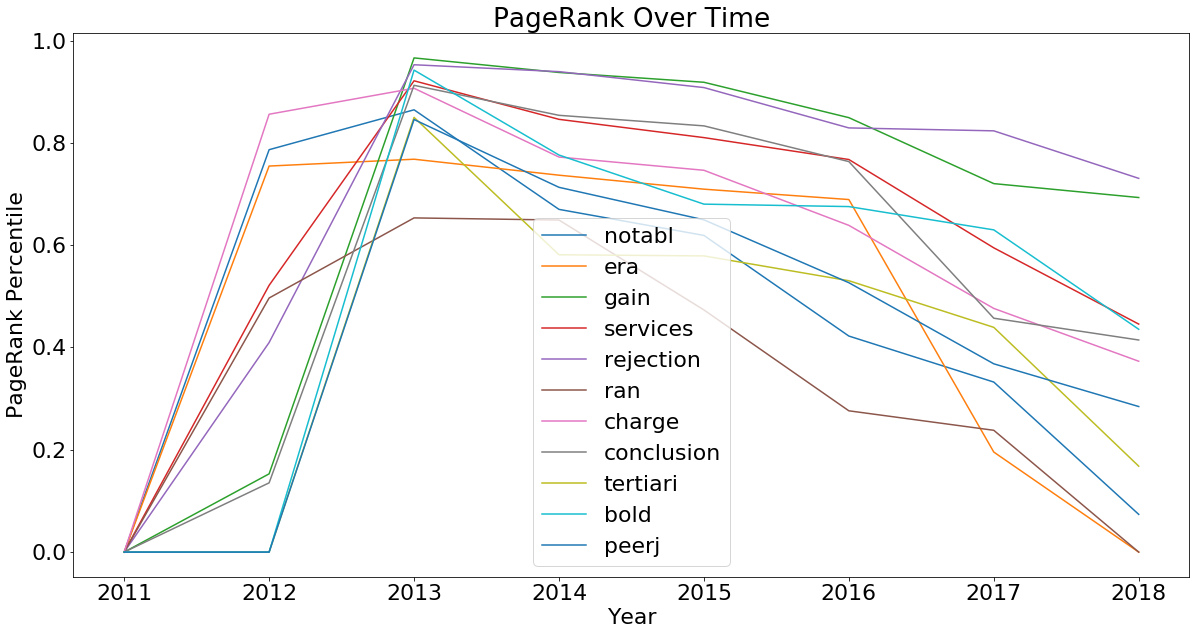

In [71]:
dec_words = df_years[decreasing_ix]
draw_pr_graph(dec_words, 'decwords')

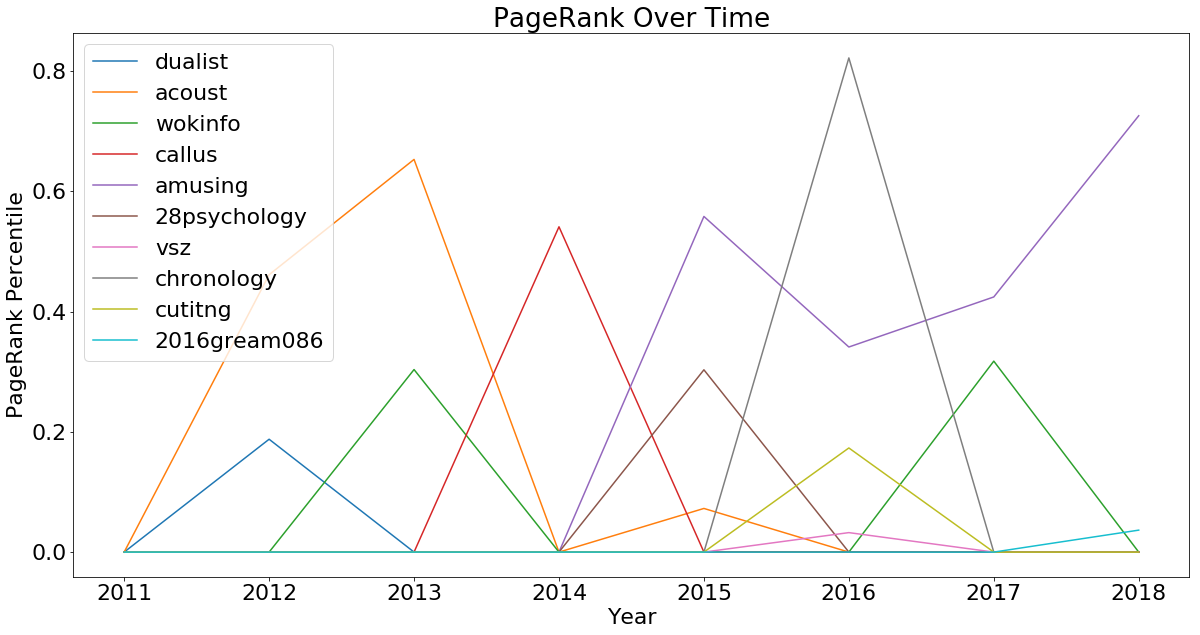

In [85]:
rand_words = df_years.sample(10)
draw_pr_graph(rand_words, 'random3')

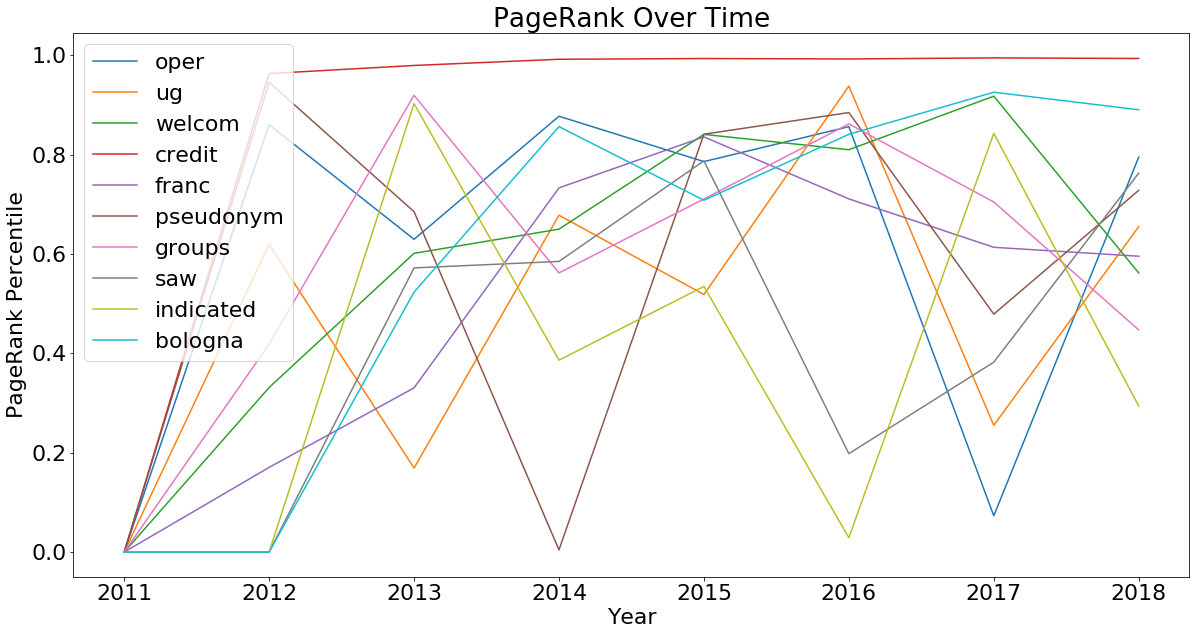

In [42]:
nonzero_ix = (df_years['pr_rank_2013'] > 0) & \
    (df_years['pr_rank_2014'] > 0) & \
    (df_years['pr_rank_2015'] > 0) & \
    (df_years['pr_rank_2016'] > 0) & \
    (df_years['pr_rank_2017'] > 0)
nonzero_words = df_years[nonzero_ix].sample(10)
draw_pr_graph(nonzero_words, 'nonzero')